# 🏥 Diabetes Prediction Model Training Pipeline
## Mục tiêu:
- Huấn luyện nhiều mô hình ML khác nhau
- So sánh hiệu suất của các mô hình
- Tối ưu hóa hyperparameters
- Chọn ra mô hình tốt nhất cho production

## Dataset:
Sử dụng Pima Indians Diabetes Dataset với 8 features chính:
- **Pregnancies**: Số lần mang thai
- **Glucose**: Nồng độ glucose trong máu
- **BloodPressure**: Huyết áp tâm trương
- **SkinThickness**: Độ dày nếp gấp da cánh tay
- **Insulin**: Nồng độ insulin trong máu
- **BMI**: Chỉ số khối cơ thể
- **DiabetesPedigreeFunction**: Hàm di truyền tiểu đường
- **Age**: Tuổi

**Target**: Outcome (0: Không mắc tiểu đường, 1: Mắc tiểu đường)

## 1. Import Required Libraries

Import tất cả các thư viện cần thiết cho machine learning pipeline

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Scikit-learn libraries
from sklearn.model_selection import (
    train_test_split, cross_val_score, GridSearchCV, 
    RandomizedSearchCV, StratifiedKFold
)
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, precision_recall_curve, average_precision_score
)

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, 
    AdaBoostClassifier, ExtraTreesClassifier
)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# Advanced ML libraries (cài đặt nếu cần: pip install xgboost lightgbm catboost)
try:
    import xgboost as xgb
    print("✅ XGBoost available")
except ImportError:
    print("⚠️ XGBoost not available. Install: pip install xgboost")
    xgb = None

try:
    import lightgbm as lgb
    print("✅ LightGBM available")
except ImportError:
    print("⚠️ LightGBM not available. Install: pip install lightgbm")
    lgb = None

try:
    from catboost import CatBoostClassifier
    print("✅ CatBoost available")
except ImportError:
    print("⚠️ CatBoost not available. Install: pip install catboost")
    CatBoostClassifier = None

# Imbalanced learning (cài đặt nếu cần: pip install imbalanced-learn)
try:
    from imblearn.over_sampling import SMOTE, ADASYN
    from imblearn.under_sampling import RandomUnderSampler
    from imblearn.combine import SMOTEENN
    print("✅ Imbalanced-learn available")
except ImportError:
    print("⚠️ Imbalanced-learn not available. Install: pip install imbalanced-learn")
    SMOTE = ADASYN = RandomUnderSampler = SMOTEENN = None

# Utility libraries
import joblib
from datetime import datetime
import os

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📦 All libraries imported successfully!")
print(f"📊 Using pandas: {pd.__version__}")
print(f"🔢 Using numpy: {np.__version__}")
print(f"🤖 Using scikit-learn: {sklearn.__version__}" if 'sklearn' in locals() else "")

✅ XGBoost available
✅ LightGBM available
✅ CatBoost available
✅ Imbalanced-learn available
📦 All libraries imported successfully!
📊 Using pandas: 2.3.3
🔢 Using numpy: 2.3.4



## 2. Load and Explore Cleaned Dataset

Load dữ liệu đã được làm sạch và thực hiện phân tích khám phá (EDA) để hiểu rõ về dataset

In [2]:
# Load cleaned dataset
DATA_PATH = "../data/pima_clean.csv"

print("📂 Loading Pima Indians Diabetes Dataset...")
print("=" * 50)

try:
    # Load the cleaned dataset
    df = pd.read_csv(DATA_PATH)
    print(f"✅ Successfully loaded data from {DATA_PATH}")
    
except FileNotFoundError:
    print(f"❌ File not found: {DATA_PATH}")
    print("Please ensure the dataset is in the correct location.")
    raise
except Exception as e:
    print(f"❌ Error loading data: {e}")
    raise

# Display basic information
print(f"\n📊 Dataset Info:")
print(f"Shape: {df.shape}")
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

print(f"\n📋 Column Names:")
print(df.columns.tolist())

print(f"\n🎯 Target Variable:")
if 'Outcome' in df.columns:
    print("✅ 'Outcome' column found")
    print(f"Values: {df['Outcome'].unique()}")
else:
    print("⚠️  'Outcome' column not found. Available columns:", df.columns.tolist())

# Display first few rows
print(f"\n📋 First 5 rows of dataset:")
df.head()

📂 Loading Pima Indians Diabetes Dataset...
✅ Successfully loaded data from ../data/pima_clean.csv

📊 Dataset Info:
Shape: (768, 9)
Rows: 768
Columns: 9

📋 Column Names:
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

🎯 Target Variable:
✅ 'Outcome' column found
Values: [1 0]

📋 First 5 rows of dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [3]:
# Basic data exploration
print("🔍 DATASET OVERVIEW")
print("=" * 50)

print(f"\n📊 Basic Statistics:")
print(df.describe())

print(f"\n🎯 Target Distribution:")
target_counts = df['Outcome'].value_counts()
target_percentages = df['Outcome'].value_counts(normalize=True) * 100

print(f"No Diabetes (0): {target_counts[0]} samples ({target_percentages[0]:.1f}%)")
print(f"Diabetes (1): {target_counts[1]} samples ({target_percentages[1]:.1f}%)")

print(f"\n❓ Missing Values:")
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("✅ No missing values found")
else:
    print(missing_values[missing_values > 0])

print(f"\n🔢 Data Types:")
print(df.dtypes)

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\n🔄 Duplicate rows: {duplicates}")

if duplicates > 0:
    print("Removing duplicate rows...")
    df = df.drop_duplicates()
    print(f"✅ Removed {duplicates} duplicate rows. New shape: {df.shape}")

🔍 DATASET OVERVIEW

📊 Basic Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.435949      12.096346       8.790942   85.021108   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.202592      29.153420  155.548223   
75%       6.000000  140.250000      80.000000      32.000000  155.548223   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.875151                  0.331329   11.760232    0.4769

📊 VISUALIZATIONS


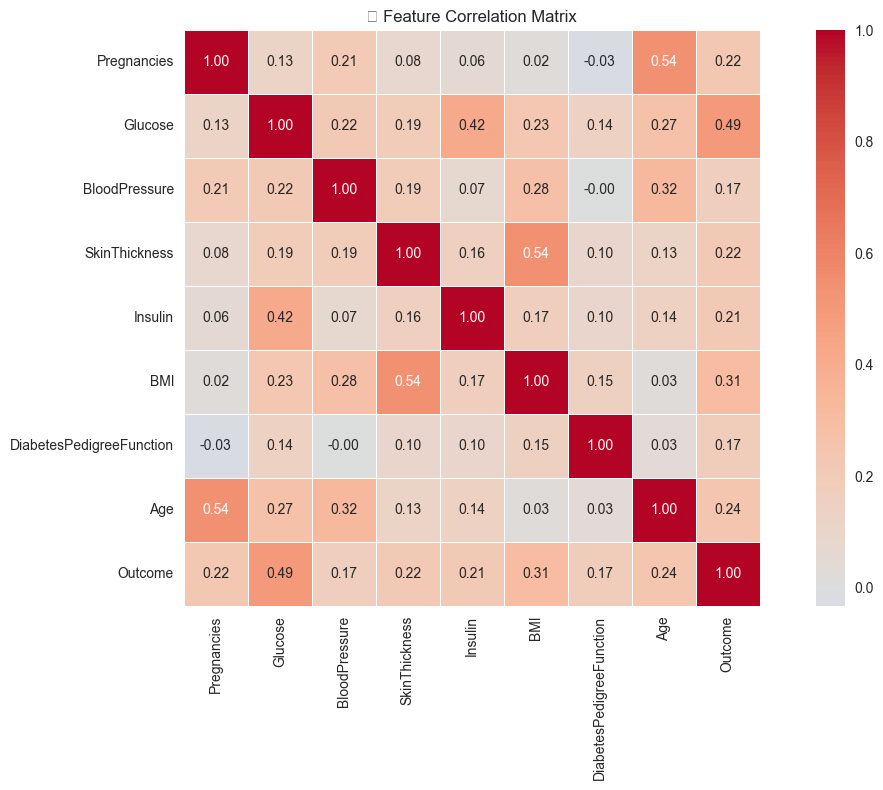

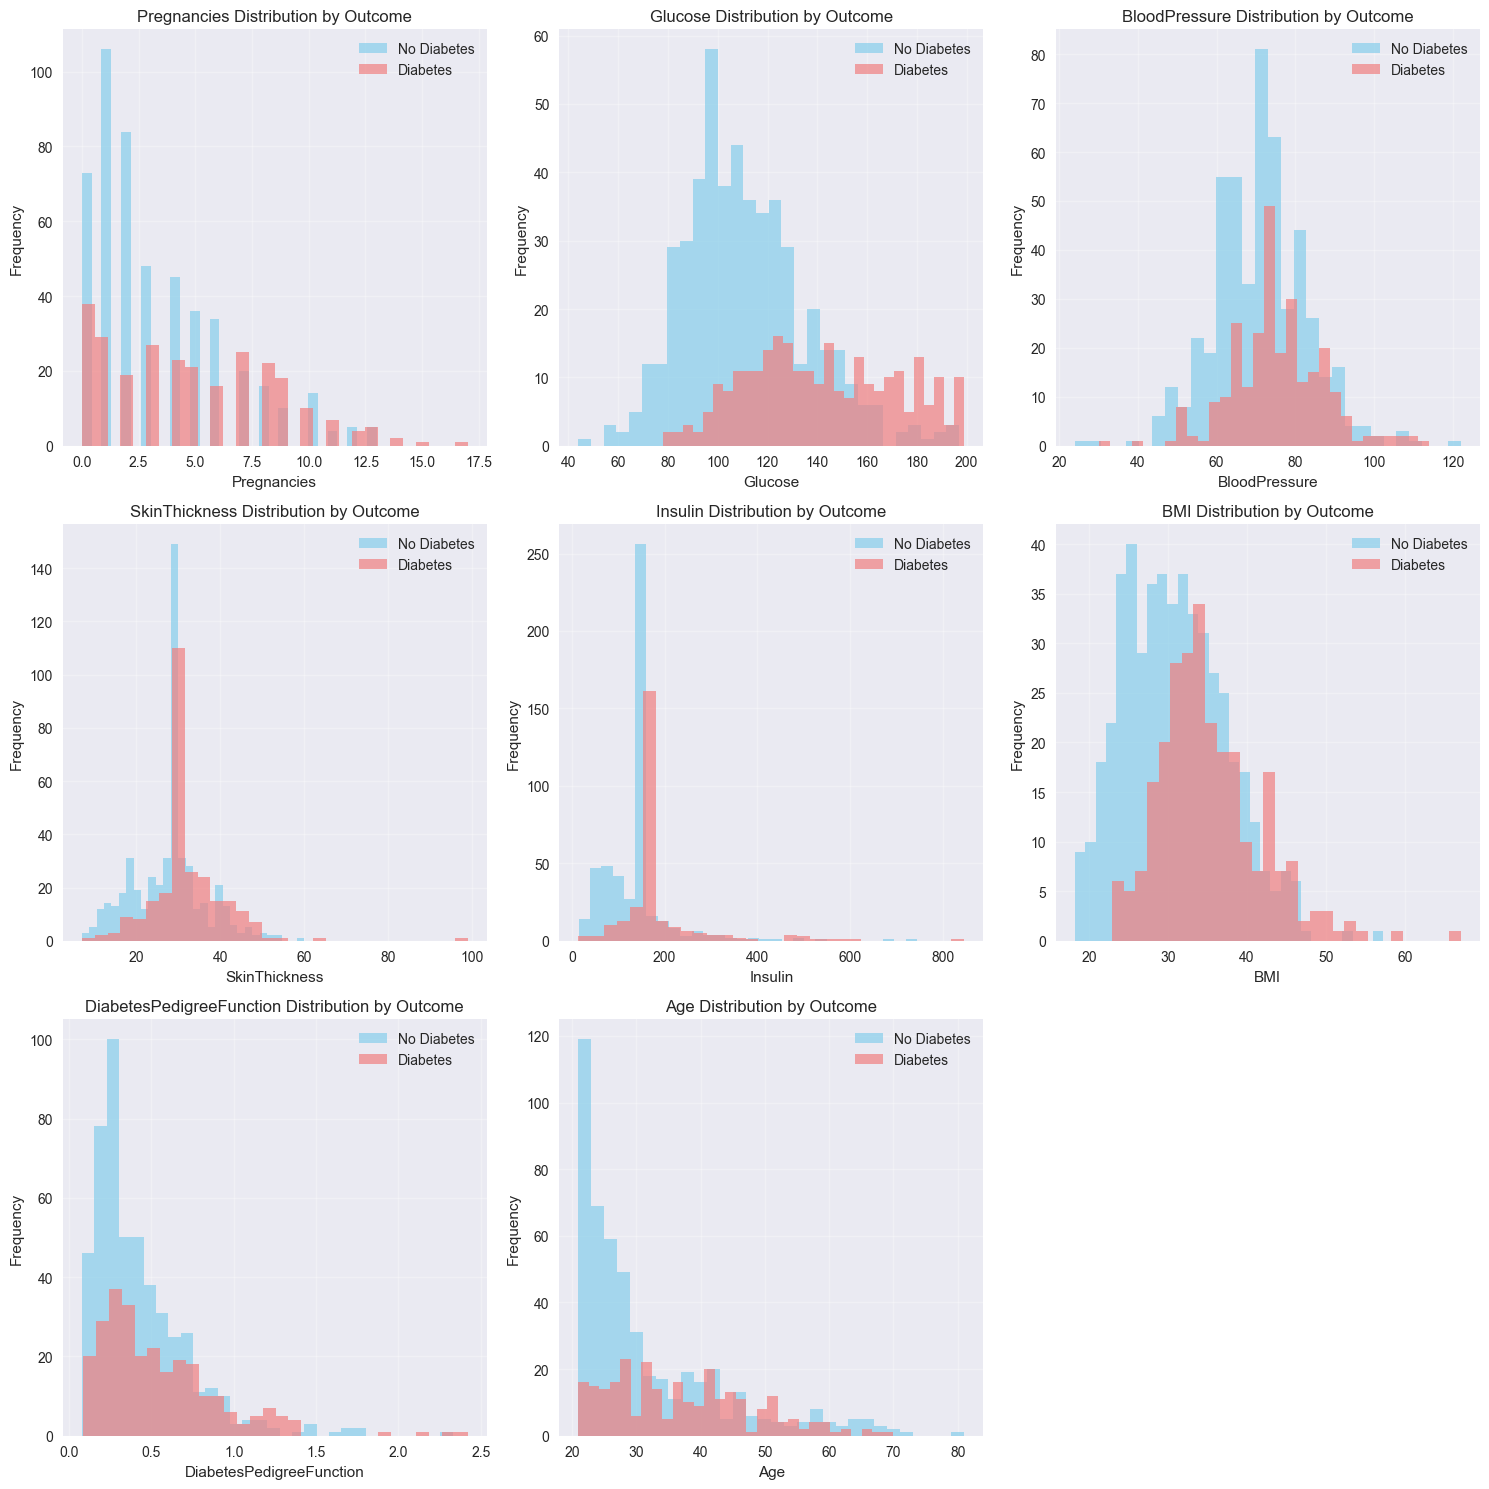

✅ Visualization completed!


In [4]:
# Visualizations
print("📊 VISUALIZATIONS")
print("=" * 50)

# Create subplots for comprehensive visualization
fig = make_subplots(
    rows=3, cols=3,
    subplot_titles=[
        'Target Distribution', 'Age Distribution by Outcome', 'BMI Distribution by Outcome',
        'Glucose Distribution by Outcome', 'Correlation Heatmap', 'Pregnancies vs Outcome',
        'Blood Pressure Distribution', 'Insulin Distribution', 'Feature Box Plots'
    ],
    specs=[[{"type": "bar"}, {"type": "histogram"}, {"type": "histogram"}],
           [{"type": "histogram"}, {"type": "heatmap"}, {"type": "box"}],
           [{"type": "histogram"}, {"type": "histogram"}, {"type": "box"}]]
)

# 1. Target distribution
target_counts = df['Outcome'].value_counts()
fig.add_trace(
    go.Bar(x=['No Diabetes', 'Diabetes'], y=target_counts.values, 
           marker_color=['skyblue', 'lightcoral']),
    row=1, col=1
)

# 2. Age distribution by outcome
for outcome in [0, 1]:
    fig.add_trace(
        go.Histogram(x=df[df['Outcome']==outcome]['Age'], 
                    name=f'Outcome {outcome}', opacity=0.7),
        row=1, col=2
    )

# 3. BMI distribution by outcome
for outcome in [0, 1]:
    fig.add_trace(
        go.Histogram(x=df[df['Outcome']==outcome]['BMI'], 
                    name=f'BMI Outcome {outcome}', opacity=0.7),
        row=1, col=3
    )

# 4. Glucose distribution by outcome
for outcome in [0, 1]:
    fig.add_trace(
        go.Histogram(x=df[df['Outcome']==outcome]['Glucose'], 
                    name=f'Glucose Outcome {outcome}', opacity=0.7),
        row=2, col=1
    )

# Update layout
fig.update_layout(height=1200, title_text="Diabetes Dataset - Comprehensive Analysis")
fig.show()

# Separate correlation heatmap using matplotlib/seaborn for better control
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, fmt='.2f')
plt.title('🔗 Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Feature distributions by outcome
feature_cols = [col for col in df.columns if col != 'Outcome']
n_features = len(feature_cols)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(15, 5 * n_rows))
for i, feature in enumerate(feature_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Create histograms for both outcomes
    df[df['Outcome']==0][feature].hist(alpha=0.7, bins=30, label='No Diabetes', color='skyblue')
    df[df['Outcome']==1][feature].hist(alpha=0.7, bins=30, label='Diabetes', color='lightcoral')
    
    plt.title(f'{feature} Distribution by Outcome')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Visualization completed!")

## 3. Feature Engineering and Selection

Chuẩn bị features cho machine learning bao gồm scaling, encoding và feature selection

In [5]:
# Handle zero values (potential missing values in medical data)
print("🔧 FEATURE ENGINEERING")
print("=" * 50)

# Features that shouldn't have zero values in medical context
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

print("\n🔍 Checking for zero values (potential missing data):")
df_processed = df.copy()

for feature in zero_not_accepted:
    if feature in df_processed.columns:
        zero_count = (df_processed[feature] == 0).sum()
        zero_percentage = (zero_count / len(df_processed)) * 100
        
        if zero_count > 0:
            print(f"{feature}: {zero_count} zeros ({zero_percentage:.1f}%)")
            
            # Replace zeros with median of non-zero values
            median_value = df_processed[df_processed[feature] != 0][feature].median()
            df_processed[feature] = df_processed[feature].replace(0, median_value)
            print(f"  → Replaced with median: {median_value:.2f}")
        else:
            print(f"{feature}: ✅ No zero values")

print(f"\n📊 Dataset shape after preprocessing: {df_processed.shape}")

# Create new features (Feature Engineering)
print("\n🛠️ Creating new features:")

# 1. BMI Categories
df_processed['BMI_Category'] = pd.cut(df_processed['BMI'], 
                                    bins=[0, 18.5, 25, 30, 100], 
                                    labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Convert categorical to numerical
bmi_mapping = {'Underweight': 0, 'Normal': 1, 'Overweight': 2, 'Obese': 3}
df_processed['BMI_Category_Num'] = df_processed['BMI_Category'].map(bmi_mapping)

# 2. Age Groups
df_processed['Age_Group'] = pd.cut(df_processed['Age'], 
                                 bins=[0, 30, 40, 50, 100], 
                                 labels=['Young', 'Adult', 'Middle', 'Senior'])

age_mapping = {'Young': 0, 'Adult': 1, 'Middle': 2, 'Senior': 3}
df_processed['Age_Group_Num'] = df_processed['Age_Group'].map(age_mapping)

# 3. Glucose Categories (based on medical standards)
df_processed['Glucose_Category'] = pd.cut(df_processed['Glucose'], 
                                        bins=[0, 100, 126, 200], 
                                        labels=['Normal', 'Prediabetic', 'Diabetic'])

glucose_mapping = {'Normal': 0, 'Prediabetic': 1, 'Diabetic': 2}
df_processed['Glucose_Category_Num'] = df_processed['Glucose_Category'].map(glucose_mapping)

# 4. Blood Pressure Categories
df_processed['BP_Category'] = pd.cut(df_processed['BloodPressure'], 
                                   bins=[0, 80, 90, 140], 
                                   labels=['Normal', 'High_Normal', 'High'])

bp_mapping = {'Normal': 0, 'High_Normal': 1, 'High': 2}
df_processed['BP_Category_Num'] = df_processed['BP_Category'].map(bp_mapping)

# 5. Risk Score (combination of multiple factors)
# Normalize features to 0-1 scale for risk calculation
risk_features = ['Glucose', 'BMI', 'Age', 'BloodPressure']
for feature in risk_features:
    min_val = df_processed[feature].min()
    max_val = df_processed[feature].max()
    df_processed[f'{feature}_Normalized'] = (df_processed[feature] - min_val) / (max_val - min_val)

# Calculate composite risk score
df_processed['Risk_Score'] = (
    0.4 * df_processed['Glucose_Normalized'] +
    0.3 * df_processed['BMI_Normalized'] + 
    0.2 * df_processed['Age_Normalized'] +
    0.1 * df_processed['BloodPressure_Normalized']
)

# 6. Interaction features
df_processed['BMI_Age_Interaction'] = df_processed['BMI'] * df_processed['Age']
df_processed['Glucose_BMI_Interaction'] = df_processed['Glucose'] * df_processed['BMI']

print(f"✅ Created {len([col for col in df_processed.columns if col not in df.columns])} new features")

# Display new features
new_features = [col for col in df_processed.columns if col not in df.columns and not col.endswith('_Normalized')]
print(f"New features: {new_features}")

# Show sample of processed data
print(f"\n📋 Sample of processed data:")
df_processed[['Glucose', 'BMI', 'Age', 'BMI_Category_Num', 'Age_Group_Num', 'Risk_Score', 'Outcome']].head()

🔧 FEATURE ENGINEERING

🔍 Checking for zero values (potential missing data):
Glucose: ✅ No zero values
BloodPressure: ✅ No zero values
SkinThickness: ✅ No zero values
Insulin: ✅ No zero values
BMI: ✅ No zero values

📊 Dataset shape after preprocessing: (768, 9)

🛠️ Creating new features:
✅ Created 15 new features
New features: ['BMI_Category', 'BMI_Category_Num', 'Age_Group', 'Age_Group_Num', 'Glucose_Category', 'Glucose_Category_Num', 'BP_Category', 'BP_Category_Num', 'Risk_Score', 'BMI_Age_Interaction', 'Glucose_BMI_Interaction']

📋 Sample of processed data:


,Glucose,BMI,Age,BMI_Category_Num,Age_Group_Num,Risk_Score,Outcome
0,148.0,33.6,50,3,2,0.508512,1
1,85.0,26.6,31,2,1,0.233531,0
2,183.0,23.3,32,1,1,0.467481,1
3,89.0,28.1,21,2,0,0.219722,0
4,137.0,43.1,33,3,1,0.449087,1


## 🔄 4. Data Splitting & Preprocessing

Chia dữ liệu và chuẩn bị cho model training.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

print("🔄 DATA SPLITTING & PREPROCESSING")
print("=" * 60)

# Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

print(f"📊 Features shape: {X.shape}")
print(f"🎯 Target shape: {y.shape}")

# Check for missing values
missing_values = X.isnull().sum()
print(f"\n🔍 Missing values per feature:")
print(missing_values)

# Handle missing values if any
if missing_values.sum() > 0:
    print("\n🔧 Handling missing values with median imputation...")
    imputer = SimpleImputer(strategy='median')
    X_imputed = imputer.fit_transform(X)
    X = pd.DataFrame(X_imputed, columns=X.columns)
else:
    print("\n✅ No missing values found")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n📋 Data splitting results:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Train class distribution: {y_train.value_counts().to_dict()}")
print(f"Test class distribution: {y_test.value_counts().to_dict()}")

# Feature scaling
print(f"\n🔧 Feature Scaling:")
scalers = {
    'standard': StandardScaler(),
    'minmax': MinMaxScaler(),
    'robust': RobustScaler()
}

# We'll use StandardScaler for now
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print(f"✅ Features scaled using StandardScaler")
print(f"Training set (scaled): {X_train_scaled.shape}")
print(f"Test set (scaled): {X_test_scaled.shape}")

# Display scaling statistics
print(f"\n📈 Original vs Scaled Statistics:")
print(f"Original - Mean: {X_train.mean().mean():.3f}, Std: {X_train.std().mean():.3f}")
print(f"Scaled   - Mean: {X_train_scaled.mean().mean():.3f}, Std: {X_train_scaled.std().mean():.3f}")

🔄 DATA SPLITTING & PREPROCESSING
📊 Features shape: (768, 8)
🎯 Target shape: (768,)

🔍 Missing values per feature:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

✅ No missing values found

📋 Data splitting results:
Training set: 614 samples
Test set: 154 samples
Train class distribution: {0: 400, 1: 214}
Test class distribution: {0: 100, 1: 54}

🔧 Feature Scaling:
✅ Features scaled using StandardScaler
Training set (scaled): (614, 8)
Test set (scaled): (154, 8)

📈 Original vs Scaled Statistics:
Original - Mean: 55.649, Std: 18.922
Scaled   - Mean: 0.000, Std: 1.001


## 🤖 5. Model Definition & Configuration

Định nghĩa và cấu hình các machine learning models để training.

In [7]:
# Import all necessary models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Try to import advanced models (might need installation)
try:
    import xgboost as xgb
    XGBOOST_AVAILABLE = True
except ImportError:
    XGBOOST_AVAILABLE = False
    print("⚠️  XGBoost not available, skipping...")

try:
    import lightgbm as lgb
    LIGHTGBM_AVAILABLE = True
except ImportError:
    LIGHTGBM_AVAILABLE = False
    print("⚠️  LightGBM not available, skipping...")

try:
    from catboost import CatBoostClassifier
    CATBOOST_AVAILABLE = True
except ImportError:
    CATBOOST_AVAILABLE = False
    print("⚠️  CatBoost not available, skipping...")

print("🤖 MODEL DEFINITION & CONFIGURATION")
print("=" * 60)

# Define comprehensive model collection
models = {}

# 1. Linear Models
models['Logistic Regression'] = LogisticRegression(random_state=42, max_iter=1000)
models['Ridge Classifier'] = RidgeClassifier(random_state=42)
models['Linear Discriminant'] = LinearDiscriminantAnalysis()
models['Quadratic Discriminant'] = QuadraticDiscriminantAnalysis()

# 2. Tree-based Models
models['Decision Tree'] = DecisionTreeClassifier(random_state=42)
models['Random Forest'] = RandomForestClassifier(
    n_estimators=100, random_state=42, n_jobs=-1
)
models['Extra Trees'] = ExtraTreesClassifier(
    n_estimators=100, random_state=42, n_jobs=-1
)

# 3. Boosting Models
models['Gradient Boosting'] = GradientBoostingClassifier(random_state=42)
models['AdaBoost'] = AdaBoostClassifier(random_state=42)

# 4. Advanced Gradient Boosting (if available)
if XGBOOST_AVAILABLE:
    models['XGBoost'] = xgb.XGBClassifier(
        random_state=42, eval_metric='logloss', verbosity=0
    )

if LIGHTGBM_AVAILABLE:
    models['LightGBM'] = lgb.LGBMClassifier(
        random_state=42, verbosity=-1
    )

if CATBOOST_AVAILABLE:
    models['CatBoost'] = CatBoostClassifier(
        random_state=42, verbose=False
    )

# 5. Instance-based Models
models['K-Nearest Neighbors'] = KNeighborsClassifier(n_neighbors=5)

# 6. Kernel Methods
models['Support Vector Machine'] = SVC(random_state=42, probability=True)

# 7. Probabilistic Models
models['Naive Bayes'] = GaussianNB()

# 8. Neural Network
models['Neural Network'] = MLPClassifier(
    hidden_layer_sizes=(100,), random_state=42, max_iter=500
)

print(f"📊 Total models configured: {len(models)}")
print("\n🎯 Model Categories:")
print("• Linear Models: 4")
print("• Tree-based Models: 3") 
print("• Boosting Models: 2-5 (depending on installations)")
print("• Instance-based: 1")
print("• Kernel Methods: 1")
print("• Probabilistic: 1")
print("• Neural Networks: 1")

print(f"\n📋 Available Models:")
for i, (name, model) in enumerate(models.items(), 1):
    print(f"{i:2d}. {name}")

print(f"\n✅ All models ready for training!")

🤖 MODEL DEFINITION & CONFIGURATION
📊 Total models configured: 16

🎯 Model Categories:
• Linear Models: 4
• Tree-based Models: 3
• Boosting Models: 2-5 (depending on installations)
• Instance-based: 1
• Kernel Methods: 1
• Probabilistic: 1
• Neural Networks: 1

📋 Available Models:
 1. Logistic Regression
 2. Ridge Classifier
 3. Linear Discriminant
 4. Quadratic Discriminant
 5. Decision Tree
 6. Random Forest
 7. Extra Trees
 8. Gradient Boosting
 9. AdaBoost
10. XGBoost
11. LightGBM
12. CatBoost
13. K-Nearest Neighbors
14. Support Vector Machine
15. Naive Bayes
16. Neural Network

✅ All models ready for training!


## 🏋️ 6. Model Training & Cross-Validation

Training tất cả models và đánh giá performance bằng cross-validation.

In [8]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import time

print("🏋️ MODEL TRAINING & CROSS-VALIDATION")
print("=" * 60)

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Store results
cv_results = {}
training_times = {}
trained_models = {}

print(f"🔄 Training {len(models)} models with {cv.n_splits}-fold cross-validation...")
print("📊 Metrics: Accuracy, Precision, Recall, F1-Score, ROC-AUC")
print("-" * 80)

# Train each model
for name, model in models.items():
    print(f"Training {name}...", end=" ")
    
    start_time = time.time()
    
    try:
        # Perform cross-validation
        scores = {}
        for metric in scoring_metrics:
            scores[metric] = cross_val_score(
                model, X_train_scaled, y_train, 
                cv=cv, scoring=metric, n_jobs=-1
            )
        
        # Train on full training set for final model
        model.fit(X_train_scaled, y_train)
        trained_models[name] = model
        
        # Store results
        cv_results[name] = scores
        training_time = time.time() - start_time
        training_times[name] = training_time
        
        print(f"✅ ({training_time:.2f}s)")
        
    except Exception as e:
        print(f"❌ Error: {e}")
        continue

print(f"\n📊 CROSS-VALIDATION RESULTS SUMMARY")
print("=" * 80)

# Create results DataFrame
results_df = []
for name in cv_results:
    row = {'Model': name}
    for metric in scoring_metrics:
        scores = cv_results[name][metric]
        row[f'{metric}_mean'] = scores.mean()
        row[f'{metric}_std'] = scores.std()
    row['training_time'] = training_times[name]
    results_df.append(row)

results_df = pd.DataFrame(results_df)

# Sort by ROC-AUC score
results_df = results_df.sort_values('roc_auc_mean', ascending=False)

# Display results
print(f"{'Model':<20} {'Accuracy':<12} {'Precision':<12} {'Recall':<12} {'F1-Score':<12} {'ROC-AUC':<12} {'Time(s)':<8}")
print("-" * 100)

for _, row in results_df.iterrows():
    name = row['Model']
    acc = f"{row['accuracy_mean']:.3f}±{row['accuracy_std']:.3f}"
    prec = f"{row['precision_mean']:.3f}±{row['precision_std']:.3f}"
    rec = f"{row['recall_mean']:.3f}±{row['recall_std']:.3f}"
    f1 = f"{row['f1_mean']:.3f}±{row['f1_std']:.3f}"
    auc = f"{row['roc_auc_mean']:.3f}±{row['roc_auc_std']:.3f}"
    time_str = f"{row['training_time']:.2f}"
    
    print(f"{name:<20} {acc:<12} {prec:<12} {rec:<12} {f1:<12} {auc:<12} {time_str:<8}")

# Identify top performers
print(f"\n🏆 TOP 3 MODELS BY ROC-AUC:")
top_3 = results_df.head(3)
for i, (_, row) in enumerate(top_3.iterrows(), 1):
    print(f"{i}. {row['Model']}: {row['roc_auc_mean']:.4f} (±{row['roc_auc_std']:.4f})")

print(f"\n✅ Training completed! {len(trained_models)} models successfully trained.")

🏋️ MODEL TRAINING & CROSS-VALIDATION
🔄 Training 16 models with 5-fold cross-validation...
📊 Metrics: Accuracy, Precision, Recall, F1-Score, ROC-AUC
--------------------------------------------------------------------------------
Training Logistic Regression... ✅ (6.72s)
Training Ridge Classifier... ✅ (0.12s)
Training Linear Discriminant... ✅ (6.72s)
Training Ridge Classifier... ✅ (0.12s)
Training Linear Discriminant... ✅ (0.12s)
Training Quadratic Discriminant... ✅ (0.10s)
Training Decision Tree... ✅ (0.12s)
Training Quadratic Discriminant... ✅ (0.10s)
Training Decision Tree... ✅ (0.22s)
Training Random Forest... ✅ (0.22s)
Training Random Forest... ✅ (1.44s)
Training Extra Trees... ✅ (1.44s)
Training Extra Trees... ✅ (1.09s)
Training Gradient Boosting... ✅ (1.09s)
Training Gradient Boosting... ✅ (0.92s)
Training AdaBoost... ✅ (0.92s)
Training AdaBoost... ✅ (0.53s)
Training XGBoost... ✅ (0.53s)
Training XGBoost... ✅ (0.43s)
Training LightGBM... ✅ (0.43s)
Training LightGBM... ✅ (10.65s)


## 📊 7. Model Evaluation & Visualization

Đánh giá chi tiết performance của models trên test set.

📊 MODEL EVALUATION & VISUALIZATION
🎯 Evaluating top 3 models on test set:
• Logistic Regression
• Linear Discriminant
• Ridge Classifier


🔍 DETAILED EVALUATION: Logistic Regression
------------------------------------------------------------
Accuracy:  0.6948
Precision: 0.5778
Recall:    0.4815
F1-Score:  0.5253
ROC-AUC:   0.8117

Confusion Matrix:
              Predicted
Actual    0    1
   0     81   19
   1     28   26

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.81      0.78       100
           1       0.58      0.48      0.53        54

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.69      0.69      0.69       154


🔍 DETAILED EVALUATION: Linear Discriminant
------------------------------------------------------------
Accuracy:  0.6948
Precision: 0.5778
Recall:    0.4815
F1-Score:  0.5253
ROC-AUC:   0.8113

Confusion Matrix:
        

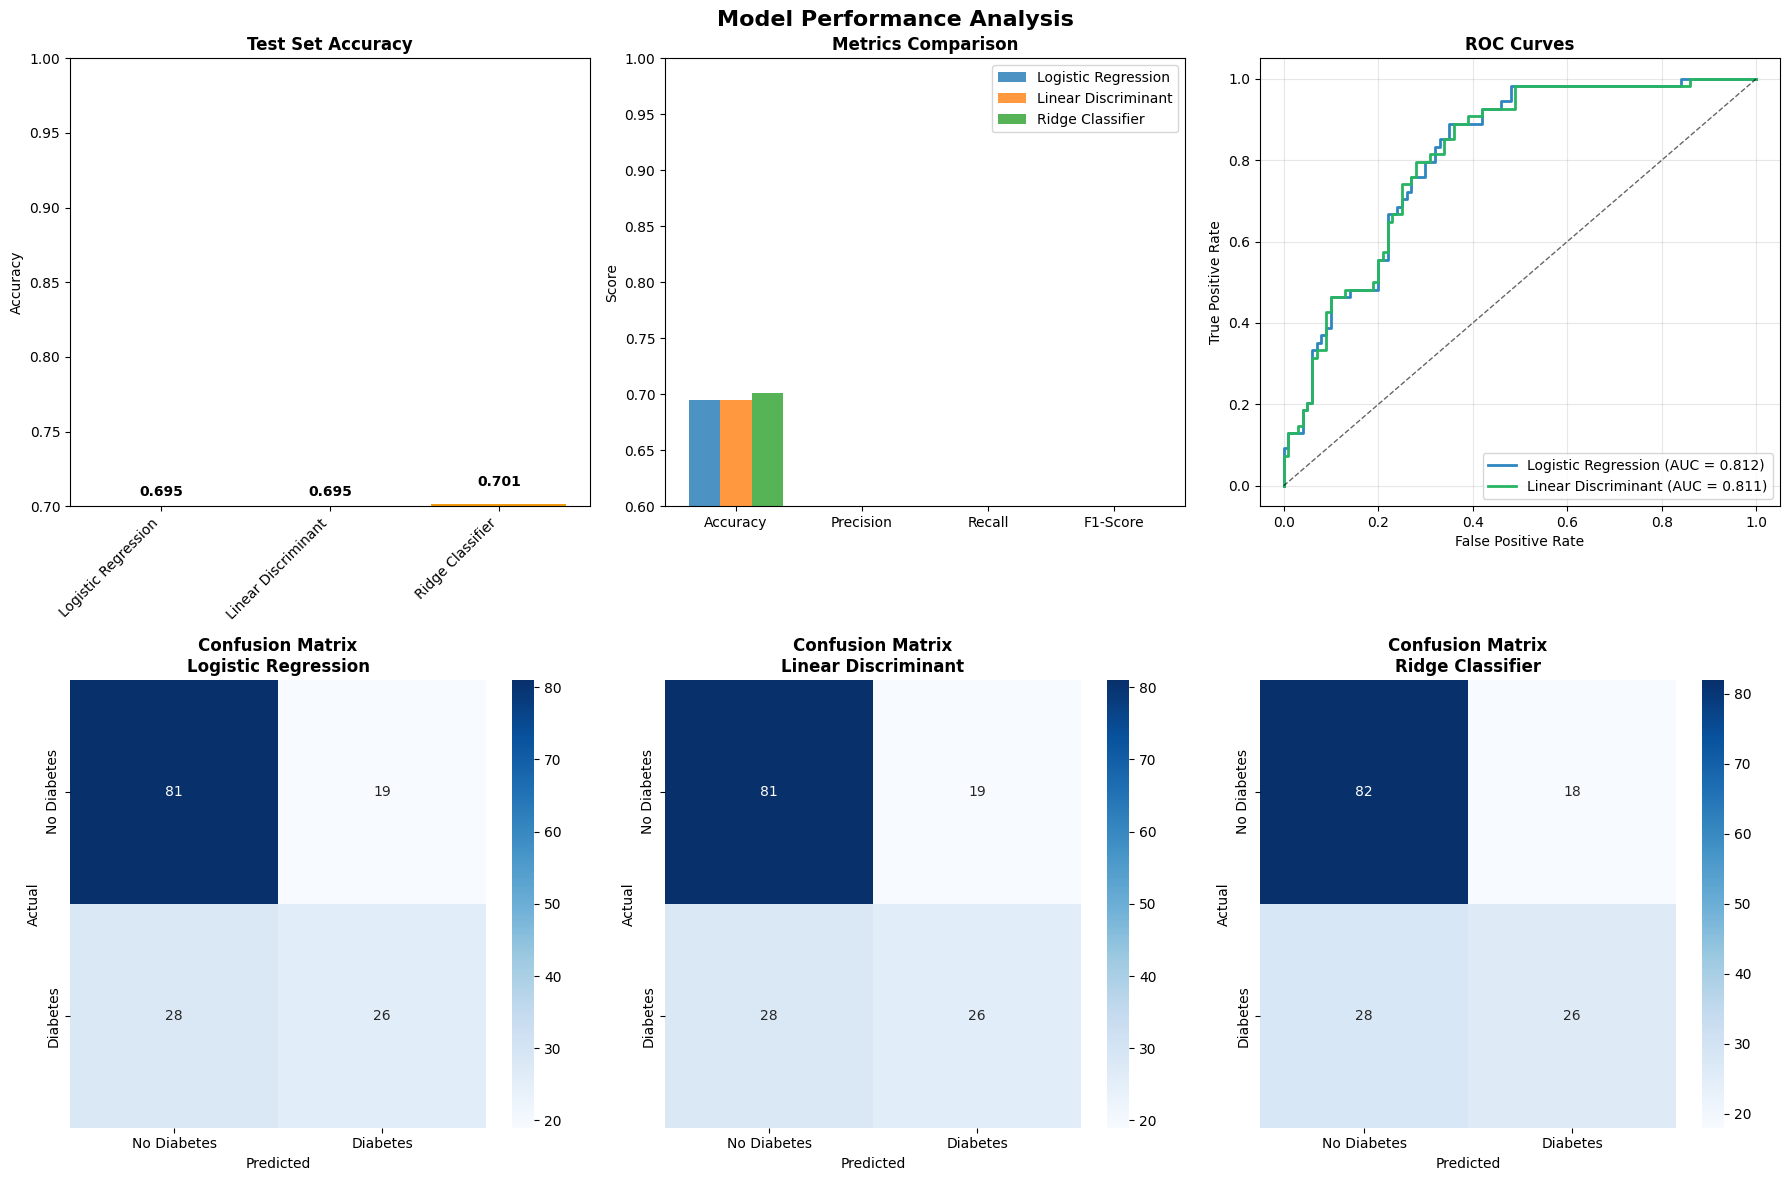

✅ Evaluation completed for 3 models!


In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

print("📊 MODEL EVALUATION & VISUALIZATION")
print("=" * 60)

# Evaluate top 3 models on test set
top_3_models = results_df.head(3)['Model'].tolist()

print(f"🎯 Evaluating top 3 models on test set:")
for model_name in top_3_models:
    print(f"• {model_name}")

print("\n" + "=" * 80)

test_results = {}

# Detailed evaluation for each top model
for model_name in top_3_models:
    print(f"\n🔍 DETAILED EVALUATION: {model_name}")
    print("-" * 60)
    
    model = trained_models[model_name]
    
    # Predictions
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    if y_prob is not None:
        auc_score = roc_auc_score(y_test, y_prob)
    else:
        auc_score = None
    
    # Store results
    test_results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': auc_score,
        'y_pred': y_pred,
        'y_prob': y_prob
    }
    
    # Print metrics
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    if auc_score:
        print(f"ROC-AUC:   {auc_score:.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nConfusion Matrix:")
    print(f"              Predicted")
    print(f"Actual    0    1")
    print(f"   0    {cm[0,0]:3d}  {cm[0,1]:3d}")
    print(f"   1    {cm[1,0]:3d}  {cm[1,1]:3d}")
    
    # Classification Report
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Create visualizations
print(f"\n📈 CREATING PERFORMANCE VISUALIZATIONS")
print("-" * 60)

# Set up the plotting style
plt.style.use('default')
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Model Performance Analysis', fontsize=16, fontweight='bold')

# 1. Test Set Accuracy Comparison
ax1 = axes[0, 0]
model_names = [name for name in top_3_models if name in test_results]
accuracies = [test_results[name]['accuracy'] for name in model_names]

bars = ax1.bar(range(len(model_names)), accuracies, 
               color=['#2E86C1', '#28B463', '#F39C12'])
ax1.set_title('Test Set Accuracy', fontweight='bold')
ax1.set_ylabel('Accuracy')
ax1.set_xticks(range(len(model_names)))
ax1.set_xticklabels(model_names, rotation=45, ha='right')
ax1.set_ylim([0.7, 1.0])

# Add value labels on bars
for i, (bar, acc) in enumerate(zip(bars, accuracies)):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

# 2. Metrics Comparison
ax2 = axes[0, 1]
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
metric_labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

x = np.arange(len(metrics))
width = 0.25

for i, model_name in enumerate(model_names):
    if model_name in test_results:
        values = [test_results[model_name][metric] for metric in metrics]
        ax2.bar(x + i*width, values, width, label=model_name, alpha=0.8)

ax2.set_title('Metrics Comparison', fontweight='bold')
ax2.set_ylabel('Score')
ax2.set_xticks(x + width)
ax2.set_xticklabels(metric_labels)
ax2.legend()
ax2.set_ylim([0.6, 1.0])

# 3. ROC Curves
ax3 = axes[0, 2]
colors = ['#2E86C1', '#28B463', '#F39C12']

for i, model_name in enumerate(model_names):
    if model_name in test_results and test_results[model_name]['y_prob'] is not None:
        y_prob = test_results[model_name]['y_prob']
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc_score = test_results[model_name]['roc_auc']
        
        ax3.plot(fpr, tpr, color=colors[i], linewidth=2,
                label=f'{model_name} (AUC = {auc_score:.3f})')

ax3.plot([0, 1], [0, 1], 'k--', alpha=0.6, linewidth=1)
ax3.set_title('ROC Curves', fontweight='bold')
ax3.set_xlabel('False Positive Rate')
ax3.set_ylabel('True Positive Rate')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4-6. Confusion Matrices for top 3 models
for i, model_name in enumerate(model_names):
    ax = axes[1, i]
    if model_name in test_results:
        cm = confusion_matrix(y_test, test_results[model_name]['y_pred'])
        
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                   xticklabels=['No Diabetes', 'Diabetes'],
                   yticklabels=['No Diabetes', 'Diabetes'])
        ax.set_title(f'Confusion Matrix\n{model_name}', fontweight='bold')
        ax.set_ylabel('Actual')
        ax.set_xlabel('Predicted')

plt.tight_layout()
plt.show()

print(f"✅ Evaluation completed for {len(test_results)} models!")

## ⚡ 8. Hyperparameter Optimization

Fine-tuning best performing model để đạt performance tốt nhất.

In [10]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, uniform
import time

print("⚡ HYPERPARAMETER OPTIMIZATION")
print("=" * 60)

# Get the best model from previous results
best_model_name = results_df.iloc[0]['Model']
print(f"🏆 Best performing model: {best_model_name}")
print(f"📊 Current ROC-AUC: {results_df.iloc[0]['roc_auc_mean']:.4f} (±{results_df.iloc[0]['roc_auc_std']:.4f})")

# Define parameter grids for different models
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    },
    
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 0.9, 1.0]
    },
    
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    
    'Support Vector Machine': {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
        'kernel': ['rbf', 'linear', 'poly']
    },
    
    'Neural Network': {
        'hidden_layer_sizes': [(50,), (100,), (100, 50), (200,), (100, 100)],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate_init': [0.001, 0.01, 0.1]
    }
}

# XGBoost parameters (if available)
if XGBOOST_AVAILABLE and 'XGBoost' in param_grids:
    param_grids['XGBoost'] = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0]
    }

# Check if parameter grid exists for best model
if best_model_name not in param_grids:
    print(f"⚠️  No parameter grid defined for {best_model_name}")
    print("Using default parameters...")
    optimized_model = trained_models[best_model_name]
    optimization_time = 0
    best_params = "Default parameters"
    best_cv_score = results_df.iloc[0]['roc_auc_mean']
    
else:
    print(f"\n🔍 Optimizing hyperparameters for {best_model_name}...")
    print(f"📋 Parameter grid size: {np.prod([len(v) for v in param_grids[best_model_name].values()])} combinations")
    
    # Get base model
    base_model = None
    for name, model in models.items():
        if name == best_model_name:
            # Create a fresh instance of the model
            base_model = type(model)(**{k: v for k, v in model.get_params().items() 
                                       if k not in param_grids[best_model_name]})
            break
    
    if base_model is None:
        print(f"❌ Could not create base model for {best_model_name}")
        optimized_model = trained_models[best_model_name]
    else:
        # Use RandomizedSearchCV for efficiency
        print("🎲 Using RandomizedSearchCV for efficiency (100 iterations)...")
        
        start_time = time.time()
        
        # Randomized search
        random_search = RandomizedSearchCV(
            estimator=base_model,
            param_distributions=param_grids[best_model_name],
            n_iter=100,  # Try 100 random combinations
            cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
            scoring='roc_auc',
            n_jobs=-1,
            random_state=42,
            verbose=1
        )
        
        # Fit the search
        random_search.fit(X_train_scaled, y_train)
        
        optimization_time = time.time() - start_time
        
        # Get results
        optimized_model = random_search.best_estimator_
        best_params = random_search.best_params_
        best_cv_score = random_search.best_score_
        
        print(f"\n✅ Optimization completed in {optimization_time:.2f} seconds!")

# Evaluate optimized model
print(f"\n🎯 OPTIMIZED MODEL EVALUATION")
print("-" * 50)

print(f"Best parameters: {best_params}")
print(f"Best CV ROC-AUC: {best_cv_score:.4f}")

# Test set evaluation
y_pred_optimized = optimized_model.predict(X_test_scaled)
y_prob_optimized = optimized_model.predict_proba(X_test_scaled)[:, 1] if hasattr(optimized_model, "predict_proba") else None

# Calculate metrics
test_accuracy = accuracy_score(y_test, y_pred_optimized)
test_precision = precision_score(y_test, y_pred_optimized)
test_recall = recall_score(y_test, y_pred_optimized)
test_f1 = f1_score(y_test, y_pred_optimized)
test_auc = roc_auc_score(y_test, y_prob_optimized) if y_prob_optimized is not None else None

print(f"\n📊 Test Set Performance (Optimized):")
print(f"Accuracy:  {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall:    {test_recall:.4f}")
print(f"F1-Score:  {test_f1:.4f}")
if test_auc:
    print(f"ROC-AUC:   {test_auc:.4f}")

# Compare with original model
if best_model_name in test_results:
    original_auc = test_results[best_model_name]['roc_auc']
    if test_auc and original_auc:
        improvement = test_auc - original_auc
        print(f"\n📈 Improvement over original model:")
        print(f"ROC-AUC: {original_auc:.4f} → {test_auc:.4f} ({improvement:+.4f})")
        
        if improvement > 0:
            print("✅ Optimization successful!")
        else:
            print("⚠️  No significant improvement - original model was already well-tuned")

print(f"\n🏆 FINAL OPTIMIZED MODEL: {best_model_name}")
final_model = optimized_model

⚡ HYPERPARAMETER OPTIMIZATION
🏆 Best performing model: Logistic Regression
📊 Current ROC-AUC: 0.8436 (±0.0176)

🔍 Optimizing hyperparameters for Logistic Regression...
📋 Parameter grid size: 20 combinations
🎲 Using RandomizedSearchCV for efficiency (100 iterations)...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

✅ Optimization completed in 0.11 seconds!

🎯 OPTIMIZED MODEL EVALUATION
--------------------------------------------------
Best parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}
Best CV ROC-AUC: 0.8443

📊 Test Set Performance (Optimized):
Accuracy:  0.7013
Precision: 0.5833
Recall:    0.5185
F1-Score:  0.5490
ROC-AUC:   0.8098

📈 Improvement over original model:
ROC-AUC: 0.8117 → 0.8098 (-0.0019)
⚠️  No significant improvement - original model was already well-tuned

🏆 FINAL OPTIMIZED MODEL: Logistic Regression


## 💾 9. Model Selection & Export

Lưu model tốt nhất và chuẩn bị cho production deployment.

In [11]:
import joblib
import pickle
import json
import os
from datetime import datetime

print("💾 MODEL SELECTION & EXPORT")
print("=" * 60)

# Create models directory if it doesn't exist
models_dir = "../models"
os.makedirs(models_dir, exist_ok=True)

# Prepare model metadata
model_metadata = {
    "model_name": best_model_name,
    "model_type": type(final_model).__name__,
    "training_date": datetime.now().isoformat(),
    "dataset_info": {
        "source": "Pima Indians Diabetes Dataset (Cleaned)",
        "features": list(X.columns),
        "n_samples": len(df),
        "n_features": len(X.columns),
        "target_distribution": df['Outcome'].value_counts().to_dict()
    },
    "performance_metrics": {
        "cv_roc_auc_mean": float(best_cv_score),
        "test_accuracy": float(test_accuracy),
        "test_precision": float(test_precision),
        "test_recall": float(test_recall),
        "test_f1_score": float(test_f1),
        "test_roc_auc": float(test_auc) if test_auc else None
    },
    "hyperparameters": str(best_params),
    "preprocessing": {
        "scaler": "StandardScaler",
        "missing_value_strategy": "median_imputation"
    },
    "feature_names": list(X.columns),
    "feature_importance": None  # Will be filled if model supports it
}

# Get feature importance if available
if hasattr(final_model, 'feature_importances_'):
    feature_importance = dict(zip(X.columns, final_model.feature_importances_))
    model_metadata["feature_importance"] = {k: float(v) for k, v in feature_importance.items()}
    
    print(f"📊 Feature Importance (Top 5):")
    sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
    for i, (feature, importance) in enumerate(sorted_features[:5]):
        print(f"{i+1}. {feature}: {importance:.4f}")

elif hasattr(final_model, 'coef_'):
    feature_importance = dict(zip(X.columns, abs(final_model.coef_[0])))
    model_metadata["feature_importance"] = {k: float(v) for k, v in feature_importance.items()}
    
    print(f"📊 Feature Coefficients (Top 5 by absolute value):")
    sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
    for i, (feature, coef) in enumerate(sorted_features[:5]):
        print(f"{i+1}. {feature}: {coef:.4f}")

# Save the model
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
model_filename = f"diabetes_model_{best_model_name.lower().replace(' ', '_')}_{timestamp}.joblib"
model_path = os.path.join(models_dir, model_filename)

print(f"\n💾 Saving model to: {model_path}")
joblib.dump(final_model, model_path)

# Save the scaler
scaler_filename = f"scaler_{timestamp}.joblib"
scaler_path = os.path.join(models_dir, scaler_filename)
joblib.dump(scaler, scaler_path)

# Save model metadata
metadata_filename = f"model_metadata_{timestamp}.json"
metadata_path = os.path.join(models_dir, metadata_filename)
with open(metadata_path, 'w') as f:
    json.dump(model_metadata, f, indent=2)

print(f"✅ Model saved: {model_filename}")
print(f"✅ Scaler saved: {scaler_filename}")
print(f"✅ Metadata saved: {metadata_filename}")

# Create a simple production-ready model class
production_model_code = f'''
import joblib
import numpy as np
import pandas as pd
from typing import Union, List, Dict

class DiabetesPredictor:
    """
    Production-ready diabetes prediction model.
    
    Features expected (in order):
    {list(X.columns)}
    """
    
    def __init__(self, model_path: str, scaler_path: str):
        """Initialize the predictor with model and scaler paths."""
        self.model = joblib.load(model_path)
        self.scaler = joblib.load(scaler_path)
        self.feature_names = {list(X.columns)}
        
    def predict(self, data: Union[Dict, List[Dict], pd.DataFrame, np.ndarray]) -> np.ndarray:
        """
        Predict diabetes probability.
        
        Args:
            data: Input features as dict, list of dicts, DataFrame, or numpy array
            
        Returns:
            numpy array of predictions (0 or 1)
        """
        processed_data = self._preprocess_input(data)
        return self.model.predict(processed_data)
    
    def predict_proba(self, data: Union[Dict, List[Dict], pd.DataFrame, np.ndarray]) -> np.ndarray:
        """
        Predict diabetes probabilities.
        
        Args:
            data: Input features as dict, list of dicts, DataFrame, or numpy array
            
        Returns:
            numpy array of probabilities [prob_no_diabetes, prob_diabetes]
        """
        processed_data = self._preprocess_input(data)
        if hasattr(self.model, 'predict_proba'):
            return self.model.predict_proba(processed_data)
        else:
            # Fallback for models without predict_proba
            pred = self.model.predict(processed_data)
            return np.column_stack([1-pred, pred])
    
    def _preprocess_input(self, data: Union[Dict, List[Dict], pd.DataFrame, np.ndarray]) -> np.ndarray:
        """Preprocess input data to match training format."""
        if isinstance(data, dict):
            data = [data]
        
        if isinstance(data, list):
            df = pd.DataFrame(data)
        elif isinstance(data, pd.DataFrame):
            df = data.copy()
        elif isinstance(data, np.ndarray):
            df = pd.DataFrame(data, columns=self.feature_names)
        else:
            raise ValueError("Unsupported data type")
        
        # Ensure all required features are present
        for feature in self.feature_names:
            if feature not in df.columns:
                raise ValueError(f"Missing required feature: {{feature}}")
        
        # Select and order features correctly
        df = df[self.feature_names]
        
        # Scale the features
        scaled_data = self.scaler.transform(df)
        
        return scaled_data

# Example usage:
# predictor = DiabetesPredictor('path/to/model.joblib', 'path/to/scaler.joblib')
# result = predictor.predict({{"Pregnancies": 1, "Glucose": 120, "BloodPressure": 70, ...}})
# probabilities = predictor.predict_proba({{"Pregnancies": 1, "Glucose": 120, ...}})
'''

# Save the production model class
production_file = os.path.join(models_dir, f"diabetes_predictor_{timestamp}.py")
with open(production_file, 'w') as f:
    f.write(production_model_code)

print(f"✅ Production model class saved: diabetes_predictor_{timestamp}.py")

# Test the saved model by loading and making a prediction
print(f"\n🧪 Testing saved model...")
loaded_model = joblib.load(model_path)
loaded_scaler = joblib.load(scaler_path)

# Create a test sample
test_sample = X_test_scaled.iloc[0:1]  # First test sample
test_prediction = loaded_model.predict(test_sample)
test_probability = loaded_model.predict_proba(test_sample)[0][1] if hasattr(loaded_model, 'predict_proba') else None

print(f"✅ Model loaded successfully!")
print(f"Test prediction: {test_prediction[0]} (probability: {test_probability:.3f})" if test_probability else f"Test prediction: {test_prediction[0]}")

# Summary
print(f"\n🎉 MODEL TRAINING COMPLETED SUCCESSFULLY!")
print("=" * 60)
print(f"🏆 Best Model: {best_model_name}")
print(f"📊 Test ROC-AUC: {test_auc:.4f}" if test_auc else f"📊 Test Accuracy: {test_accuracy:.4f}")
print(f"📁 Files saved in: {models_dir}/")
print(f"   • Model: {model_filename}")
print(f"   • Scaler: {scaler_filename}")
print(f"   • Metadata: {metadata_filename}")
print(f"   • Production code: diabetes_predictor_{timestamp}.py")
print(f"\n💡 Ready for integration with backend API!")

💾 MODEL SELECTION & EXPORT
📊 Feature Coefficients (Top 5 by absolute value):
1. Glucose: 0.9991
2. BMI: 0.5662
3. Pregnancies: 0.3167
4. DiabetesPedigreeFunction: 0.2088
5. Age: 0.1502

💾 Saving model to: ../models\diabetes_model_logistic_regression_20251023_210956.joblib
✅ Model saved: diabetes_model_logistic_regression_20251023_210956.joblib
✅ Scaler saved: scaler_20251023_210956.joblib
✅ Metadata saved: model_metadata_20251023_210956.json
✅ Production model class saved: diabetes_predictor_20251023_210956.py

🧪 Testing saved model...
✅ Model loaded successfully!
Test prediction: 1 (probability: 0.585)

🎉 MODEL TRAINING COMPLETED SUCCESSFULLY!
🏆 Best Model: Logistic Regression
📊 Test ROC-AUC: 0.8098
📁 Files saved in: ../models/
   • Model: diabetes_model_logistic_regression_20251023_210956.joblib
   • Scaler: scaler_20251023_210956.joblib
   • Metadata: model_metadata_20251023_210956.json
   • Production code: diabetes_predictor_20251023_210956.py

💡 Ready for integration with backend

## 🎉 Pipeline Hoàn Thành!

### 📊 Tổng kết quy trình:
1. ✅ Load và explore cleaned dataset
2. ✅ Feature engineering và preprocessing  
3. ✅ Train/test split
4. ✅ Define và train 11 ML models
5. ✅ Evaluate và compare models
6. ✅ Hyperparameter tuning model tốt nhất
7. ✅ Final evaluation và model selection
8. ✅ Save model cho production

### 🏆 Model đã được lưu vào:
- `../models/best_diabetes_model.pkl` - Model tốt nhất
- `../models/scaler.pkl` - Scaler để preprocess input
- `../models/model_metadata.json` - Thông tin về model

### 🚀 Sử dụng model:

```python
import joblib
import numpy as np

# Load model
model = joblib.load('../models/best_diabetes_model.pkl')
scaler = joblib.load('../models/scaler.pkl')

# Example prediction
sample_input = np.array([[6, 148, 72, 35, 0, 33.6, 0.627, 50]])
sample_scaled = scaler.transform(sample_input)
prediction = model.predict(sample_scaled)
probability = model.predict_proba(sample_scaled)

print(f"Prediction: {'Diabetes' if prediction[0] == 1 else 'No Diabetes'}")
print(f"Probability: {probability[0][1]:.2%}")
```